# Milestone 2

In [1]:
# imports 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from scripts import *

### I. Data Prepration

In [2]:
# Read the data
# data_path = './data'
data_path = './DLCV_SS25_Dataset'  
images, labels = data_reader(data_path)


In [3]:
num_classes = len(os.listdir(data_path))
num_classes

5

In [4]:
len(images)

2351

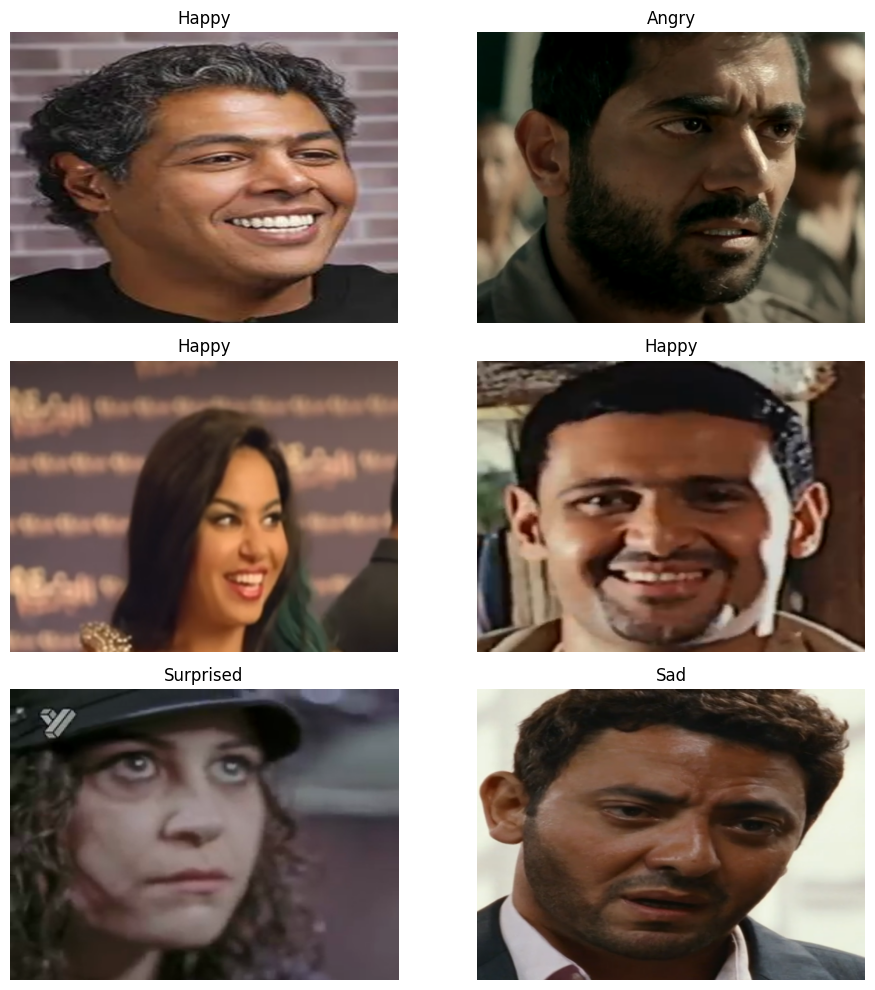

In [5]:
# View 4 random images and their titles
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(images))
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Preprocess the images 
train_tuple, val_tuple, test_tuple, label_to_index = data_preperator((images, labels))

train_data, train_labels = train_tuple
val_data, val_labels = val_tuple
test_data, test_labels = test_tuple

train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

((1645, 512, 512, 3),
 (1645,),
 (470, 512, 512, 3),
 (470,),
 (236, 512, 512, 3),
 (236,))

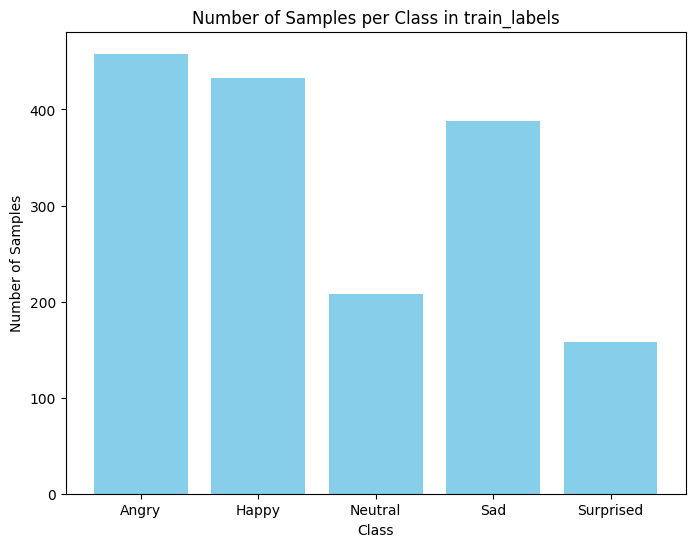

In [7]:
draw_barchart_labels(train_labels, label_to_index)

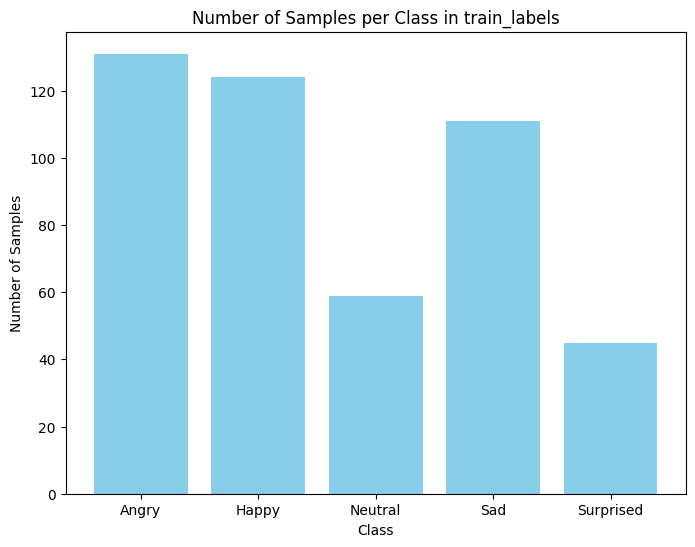

In [8]:
draw_barchart_labels(val_labels, label_to_index)

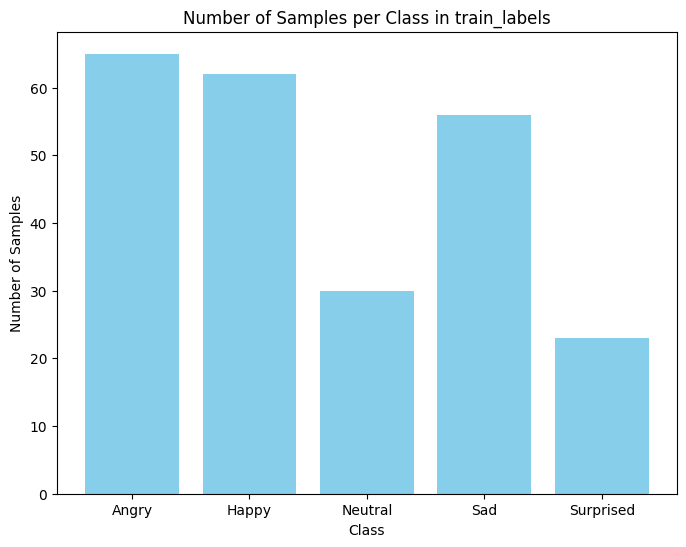

In [9]:
draw_barchart_labels(test_labels, label_to_index)

### II.First Model

In [9]:
# Predefined filters
import numpy as np

base_a = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

base_b = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

base_c = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

base_d = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

base_e = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

filter_a = np.stack([base_a]*3, axis=-1)
filter_b = np.stack([base_b]*3, axis=-1)
filter_c = np.stack([base_c]*3, axis=-1)
filter_d = np.stack([base_d]*3, axis=-1)
filter_e = np.stack([base_e]*3, axis=-1)


filters = [filter_a, filter_b, filter_c, filter_d, filter_e]

In [10]:
# Testing ConvLayer with Random filters
conv_layer = ConvLayer(4, (3, 3, 3))

output = conv_layer.forward(train_data[0])
output.shape

(510, 510, 4)

In [11]:
# Visualize the output of the convolutional layer
conv_layer = ConvLayer(5, (3, 3, 3), filter_weights=filters)

output = conv_layer.forward(train_data[0])
output.shape

(510, 510, 5)

In [12]:
# Testing the pooling layer
pooling_layer = PoolingLayer(pooling_type='MAX', pool_size=(2, 2))

output = pooling_layer.forward(train_data[0])
output.shape

(256, 256, 3)

In [13]:
first_model = FirstModel()
first_model.fit(train_data, num_clusters=4)

  0%|          | 5/1645 [00:51<4:41:12, 10.29s/it]


KeyboardInterrupt: 

### III. Second Model

In [15]:
# Test second_model is working
second_model = SecondModel()

example_image = torch.tensor(train_data[0], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

output = second_model(example_image)

print("Output shape:", output.shape)
print("Output:", output)

Output shape: torch.Size([1, 5])
Output: tensor([[-0.2586,  0.4097,  0.0179, -0.2358, -0.2974]],
       grad_fn=<AddmmBackward0>)


In [16]:
train_loader = convert_to_dataloader(data=(train_data, train_labels), batch_size=32)
val_loader = convert_to_dataloader(data=(val_data, val_labels), batch_size=32)
test_loader = convert_to_dataloader(data=(test_data, test_labels), batch_size=32)



In [17]:
model = SecondModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

training(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20], Train Loss: 1.5059, Train Acc: 0.3398, Val Loss: 1.5445, Val Acc: 0.2702
Epoch [2/20], Train Loss: 1.4277, Train Acc: 0.3842, Val Loss: 1.5097, Val Acc: 0.3468
Epoch [3/20], Train Loss: 1.3843, Train Acc: 0.4097, Val Loss: 1.4181, Val Acc: 0.4000
Epoch [4/20], Train Loss: 1.3320, Train Acc: 0.4571, Val Loss: 1.3714, Val Acc: 0.4191
Epoch [5/20], Train Loss: 1.2754, Train Acc: 0.4875, Val Loss: 1.3945, Val Acc: 0.4128
Epoch [6/20], Train Loss: 1.2125, Train Acc: 0.5094, Val Loss: 1.3780, Val Acc: 0.3936
Epoch [7/20], Train Loss: 1.1364, Train Acc: 0.5696, Val Loss: 1.3375, Val Acc: 0.4574
Epoch [8/20], Train Loss: 1.0597, Train Acc: 0.6061, Val Loss: 1.5604, Val Acc: 0.3638
Epoch [9/20], Train Loss: 0.9800, Train Acc: 0.6456, Val Loss: 1.3164, Val Acc: 0.4468
Epoch [10/20], Train Loss: 0.8926, Train Acc: 0.6821, Val Loss: 1.2845, Val Acc: 0.4681
Epoch [11/20], Train Loss: 0.8075, Train Acc: 0.7210, Val Loss: 1.2978, Val Acc: 0.4511
Epoch [12/20], Train Loss: 0.7122, Train 

#### Using augmentation

In [7]:
train_loader_augmented = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, use_aug=True)

torch.Size([32, 3, 512, 512]) torch.Size([32])


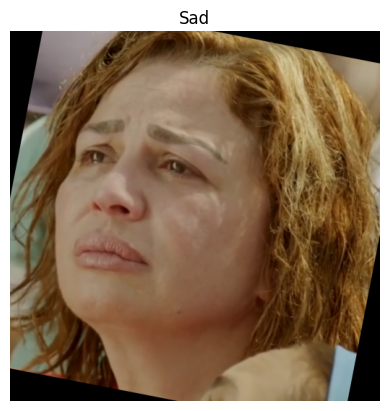

torch.Size([32, 3, 512, 512]) torch.Size([32])


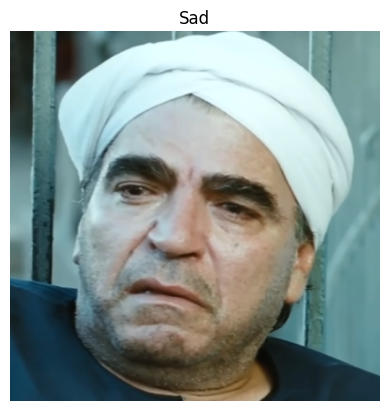

torch.Size([32, 3, 512, 512]) torch.Size([32])


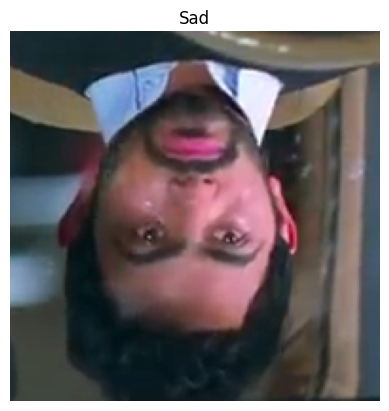

torch.Size([32, 3, 512, 512]) torch.Size([32])


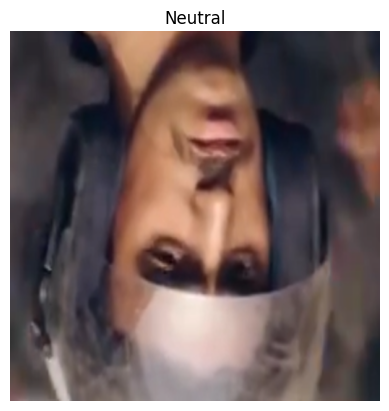

torch.Size([32, 3, 512, 512]) torch.Size([32])


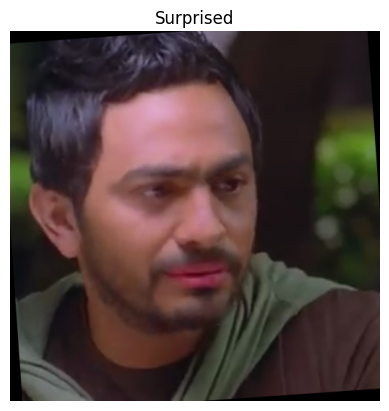

torch.Size([32, 3, 512, 512]) torch.Size([32])


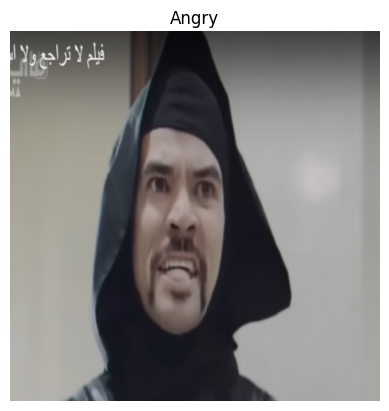

torch.Size([32, 3, 512, 512]) torch.Size([32])


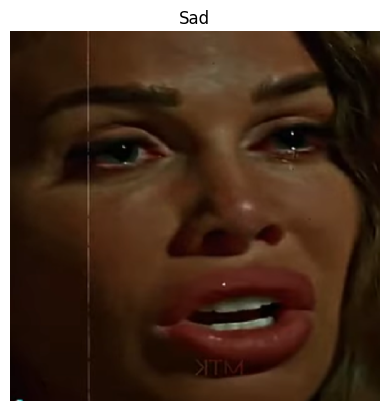

torch.Size([32, 3, 512, 512]) torch.Size([32])


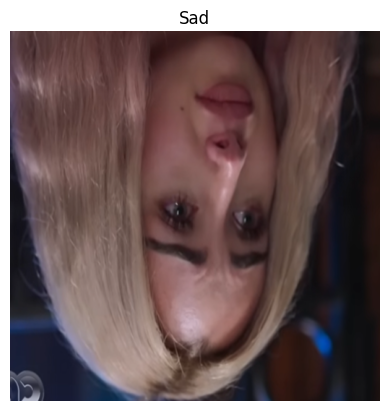

torch.Size([32, 3, 512, 512]) torch.Size([32])


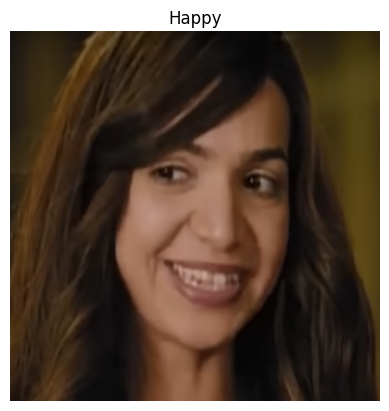

torch.Size([32, 3, 512, 512]) torch.Size([32])


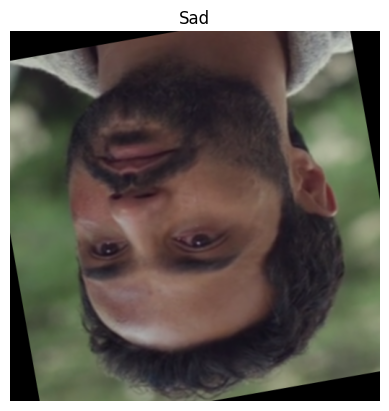

torch.Size([32, 3, 512, 512]) torch.Size([32])


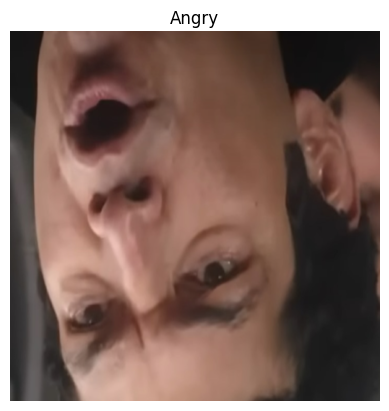

In [8]:
index_to_label = {v: k for k, v in label_to_index.items()}
i = 0
for im, label in train_loader_augmented:
    print(im.shape, label.shape)
    # Display the first image and its label
    plt.imshow(im[0].permute(1, 2, 0).numpy())
    plt.title(index_to_label[label[0].item()])
    plt.axis('off')
    plt.show()
    if i==10:
        break
    i+=1

In [19]:
model = SecondModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

training(model, train_loader_augmented, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20], Train Loss: 1.5471, Train Acc: 0.2754, Val Loss: 1.5222, Val Acc: 0.2979
Epoch [2/20], Train Loss: 1.5069, Train Acc: 0.3325, Val Loss: 1.5060, Val Acc: 0.3000
Epoch [3/20], Train Loss: 1.4733, Train Acc: 0.3374, Val Loss: 1.4928, Val Acc: 0.3319
Epoch [4/20], Train Loss: 1.4315, Train Acc: 0.3690, Val Loss: 1.4779, Val Acc: 0.3340
Epoch [5/20], Train Loss: 1.4028, Train Acc: 0.3976, Val Loss: 1.4955, Val Acc: 0.3532
Epoch [6/20], Train Loss: 1.3691, Train Acc: 0.4128, Val Loss: 1.4532, Val Acc: 0.3596
Epoch [7/20], Train Loss: 1.3281, Train Acc: 0.4511, Val Loss: 1.4527, Val Acc: 0.3574
Epoch [8/20], Train Loss: 1.2781, Train Acc: 0.4881, Val Loss: 1.4731, Val Acc: 0.3574
Epoch [9/20], Train Loss: 1.2261, Train Acc: 0.5021, Val Loss: 1.4803, Val Acc: 0.3383
Epoch [10/20], Train Loss: 1.1641, Train Acc: 0.5441, Val Loss: 1.4399, Val Acc: 0.4000
Epoch [11/20], Train Loss: 1.1089, Train Acc: 0.5793, Val Loss: 1.4690, Val Acc: 0.3766
Epoch [12/20], Train Loss: 1.0381, Train 

### Pretrained Model

#### ResNet18

In [20]:
import torchvision.models as models
from torch import nn
from torchvision import transforms

model = get_pretrained_model(model_name="resnet18", num_classes=5)

# Resize and normalize the images for pretrained models like ResNet
transform = transforms.Compose([
    transforms.ToPILImage(),  
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_loader_pretrained = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, transform=transform)
val_loader_pretrained = convert_to_dataloader(data=(val_data, val_labels), batch_size=32, transform=transform)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50
training(model, train_loader_pretrained, val_loader_pretrained, criterion, optimizer, num_epochs)



c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/50], Train Loss: 1.5240, Train Acc: 0.3301, Val Loss: 1.4442, Val Acc: 0.3766
Epoch [2/50], Train Loss: 1.3339, Train Acc: 0.4535, Val Loss: 1.3722, Val Acc: 0.3936
Epoch [3/50], Train Loss: 1.2420, Train Acc: 0.4973, Val Loss: 1.3409, Val Acc: 0.4085
Epoch [4/50], Train Loss: 1.1899, Train Acc: 0.5204, Val Loss: 1.3238, Val Acc: 0.4298
Epoch [5/50], Train Loss: 1.1415, Train Acc: 0.5502, Val Loss: 1.3221, Val Acc: 0.4234
Epoch [6/50], Train Loss: 1.1032, Train Acc: 0.5739, Val Loss: 1.2929, Val Acc: 0.4596
Epoch [7/50], Train Loss: 1.0780, Train Acc: 0.5720, Val Loss: 1.3099, Val Acc: 0.4574
Epoch [8/50], Train Loss: 1.0458, Train Acc: 0.5976, Val Loss: 1.2966, Val Acc: 0.4596
Epoch [9/50], Train Loss: 1.0418, Train Acc: 0.5945, Val Loss: 1.3322, Val Acc: 0.4447
Epoch [10/50], Train Loss: 1.0125, Train Acc: 0.6000, Val Loss: 1.3298, Val Acc: 0.4574
Epoch [11/50], Train Loss: 1.0050, Train Acc: 0.6067, Val Loss: 1.3106, Val Acc: 0.4553
Epoch [12/50], Train Loss: 0.9980, Train 